#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(20) #set random seed for repeatability of results
x = np.random.uniform(0,1,30) # generate 30 uniformly distributed x
sigma = 0.07 #given sigma
e = np.random.normal(0,sigma,30) #given random variable normally distributed
y = np.sin(2*np.pi*x)**2 # square of sin(2pix)
g = y + e #g sigma of x

df = pd.DataFrame()

In [3]:
col_names = ['x_'+ str(i) for i in range(1,19)] #create list of strings which will be used as column names of form x_1 , x_2 and so on
for ind,col in enumerate(col_names): # iterate through the index , column name of list create above
    df[col] = np.sin((ind+1)*np.pi*x) # calculate basis function which is x power 1, x power 2 and so on and add it to dataframe created above
df['g']=g # add a column to dataframe created above

In [4]:
def weight_calc_sin(k,dataframe,dependent): # function which will calculate weights of required model
    z=list(range(k)) #create list which will be used below to run through columns 
    X = np.array(dataframe.iloc[:,z ].values) # create X array which will contain independent variable
    Y = np.array(dataframe.loc[:, dependent].values) # create Y array which will contain independent variable
    weight = np.matmul(np.linalg.inv(np.matmul(X.transpose() , X)) , np.matmul(X.transpose() , Y)) # calculation of weight
    return list(weight) #output weights to 2 decimal places

In [5]:
weights=[] #empty list which will store all weights
for i in range(1,19): # iterate through all 19 columns generated above
    weights.append(weight_calc_sin(i,df,'g')) # find weights for each basis function


In [6]:
col_names = ['y_'+ str(i) for i in range(1,19)] #create list of strings which will be used as column names of form y_1 , y_2 and so on


In [7]:
for i,j in enumerate(col_names): # iterate through the index , column name of list create above
    z=list(range(i+1)) #create list which will be used below to run through columns 
    X=df.iloc[:,z] # select columns based on basis function
    df[j]= np.matmul(np.array(X),np.array([weights[i]]).transpose() ) # predict y corresponding to basis function


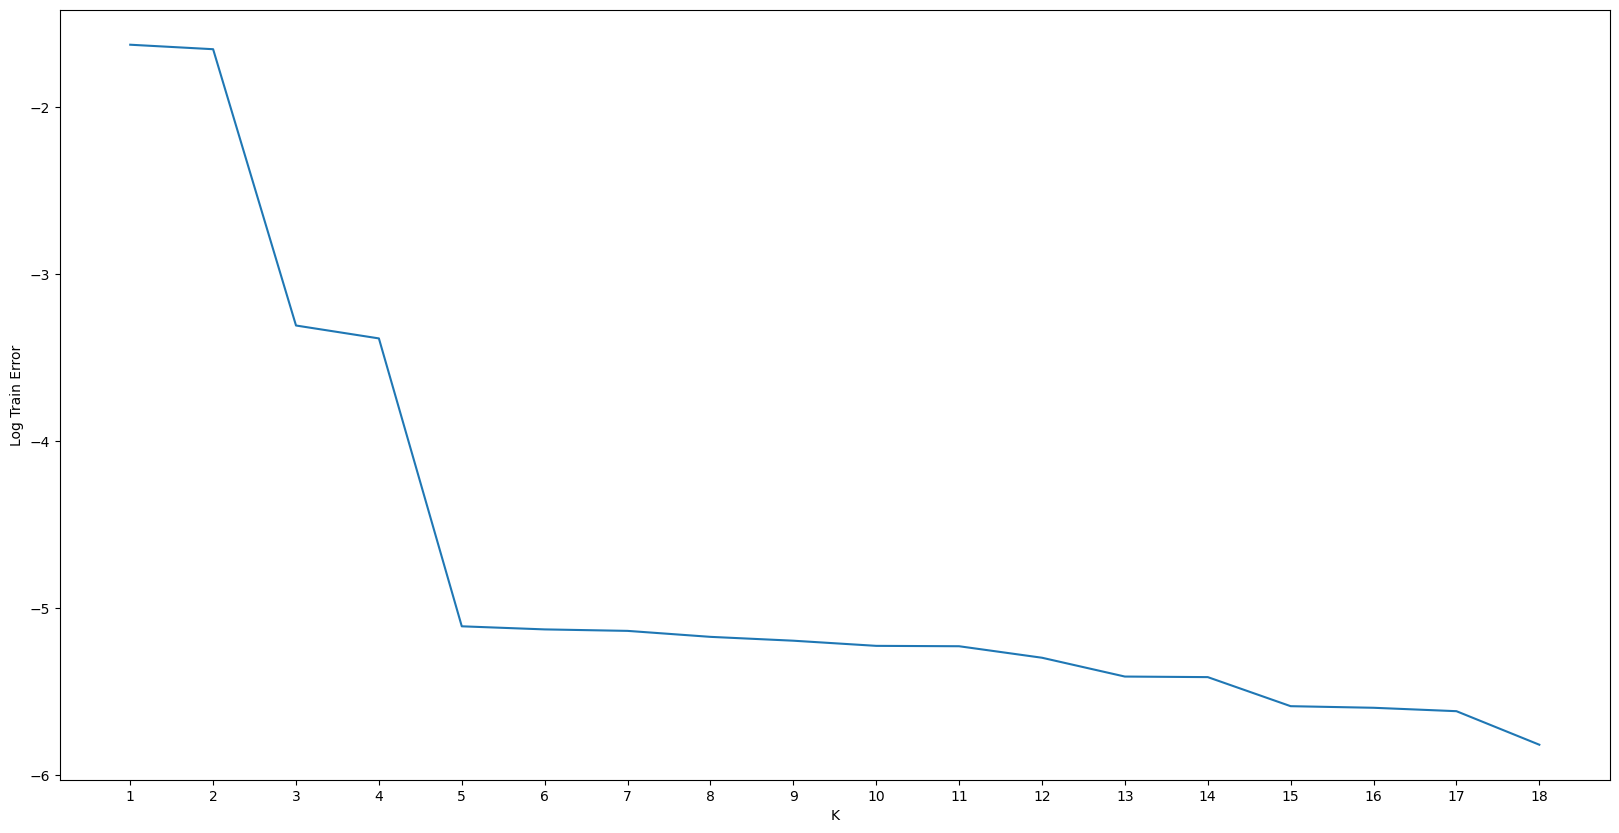

In [8]:
mse_train = []
k = list(range(1,19))
for num in k:
    mse_train.append(np.mean((df['g']-df['y_'+ str(num)])**2))
f, ax = plt.subplots(figsize=(20, 10))

plt.plot(k,np.log(mse_train))
plt.xticks(k)    
plt.xlabel('K')
plt.ylabel('Log Train Error')
plt.show()
f.savefig("figure3b.png") # save as png


In [9]:
np.random.seed(20) #random seed for reproducibility of results

x = np.random.uniform(0,1,1000) # generate 1000 uniformly distributed x
sigma = 0.07 #given sigma
e = np.random.normal(0,sigma,1000) # given e
y = np.sin(2*np.pi*x)**2  #given y
g = y + e #given g
df_test = pd.DataFrame() #create an empty dataframe


In [10]:
col_names = ['x_'+ str(i) for i in range(1,19)] #create list of strings which will be used as column names of form x_1 , x_2 and so on
for ind,col in enumerate(col_names): # iterate through the index , column name of list create above
    df_test[col] = np.sin((ind+1)*np.pi*x) # calculate basis function which is x power 1, x power 2 and so on and add it to dataframe created above
df_test['g']=g # add a column to dataframe created above


In [11]:
col_names = ['y_'+ str(i) for i in range(1,19)] #create list of strings which will be used as column names of form y_1 , y_2 and so on
for i,j in enumerate(col_names): # iterate through the index , column name of list create above
    z=list(range(i+1)) #create list which will be used below to run through columns 
    X=df_test.iloc[:,z] # select columns based on basis function
    df_test[j]= np.matmul(np.array(X),np.array([weights[i]]).transpose() ) # predict y corresponding to basis function

#### Required Plot for Q3b

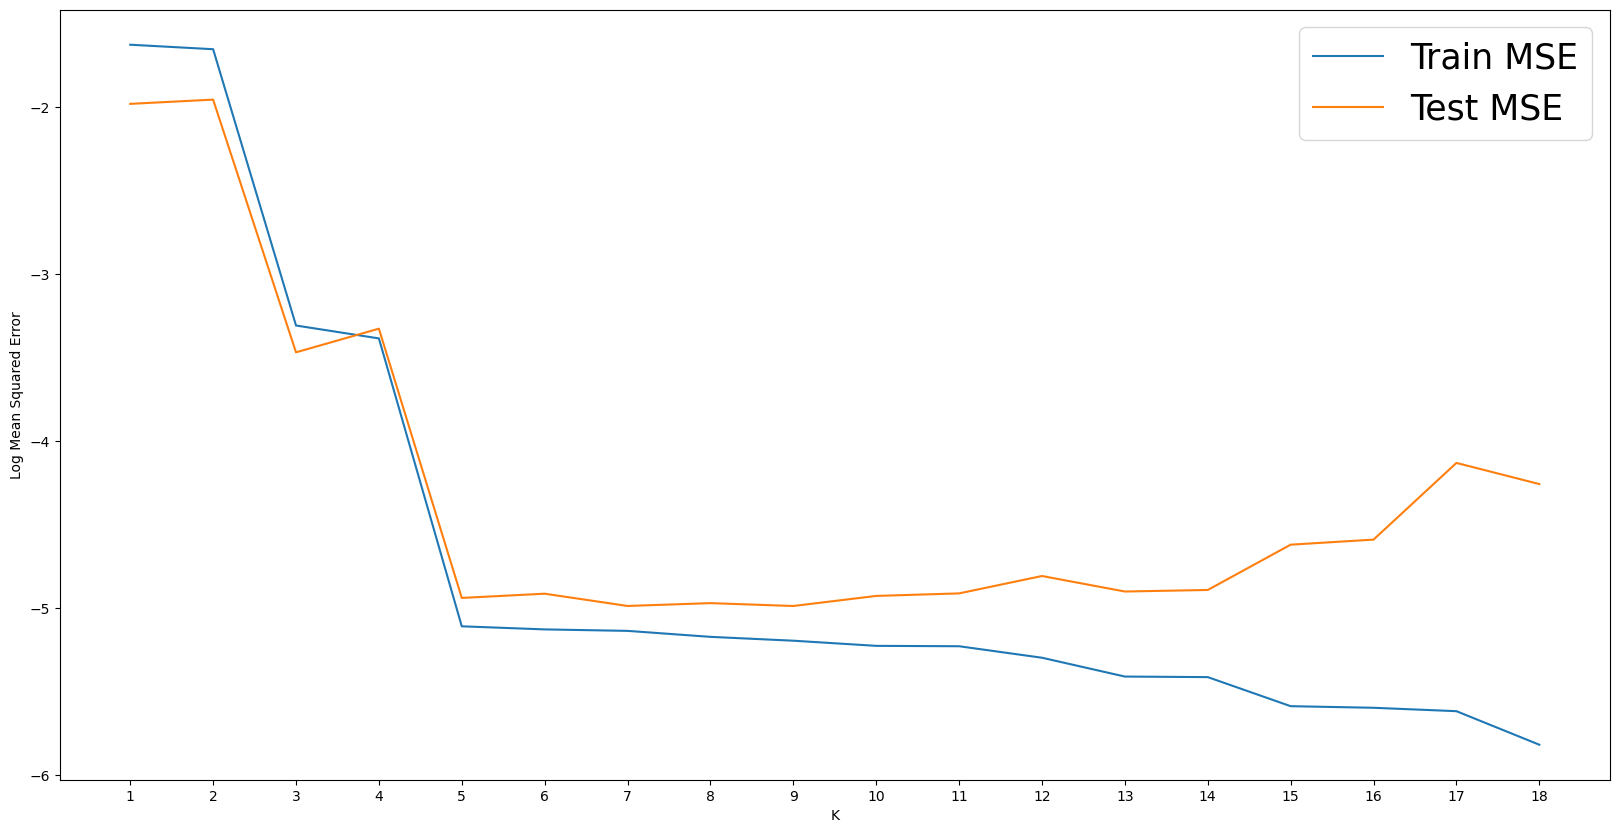

In [12]:
mse_test = []
k = list(range(1,19))
for num in k:
    mse_test.append(np.mean((df_test['g']-df_test['y_'+ str(num)])**2))
ind = list(range(1,19))
f, ax = plt.subplots(figsize=(20, 10))
plt.xticks(ind)  
  
plt.plot(ind,np.log(mse_train))

plt.plot(ind,np.log(mse_test))
ax.set_xlabel('K')
ax.set_ylabel('Log Mean Squared Error')
ax.legend(['Train MSE','Test MSE'],fontsize=25)

plt.show()
f.savefig("figure3c.png") # save as png


#### Part D

In [13]:
np.random.seed(25)
#### same method as explained above but it is run 100 times and log of average MSE for train and test sets is calculated

mse_train = []
mse_test =[]
for itr in range(100):
    x = np.random.uniform(0,1,30)
    sigma = 0.07
    e = np.random.normal(0,sigma,30)
    y = np.sin(2*np.pi*x)**2 
    g = y + e

    df = pd.DataFrame()
    col_names = ['x_'+ str(i) for i in range(1,19)]
    for ind,col in enumerate(col_names):
        df[col] = np.sin((ind+1)*np.pi*x) 
    df['g']=g
    weights=[]
    for i in range(1,19):
        weights.append(weight_calc_sin(i,df,'g'))
    col_names = ['y_'+ str(i) for i in range(1,19)]
    for i,j in enumerate(col_names):
        z=list(range(i+1)) 
        X=df.iloc[:,z]
        df[j]= np.matmul(np.array(X),np.array([weights[i]]).transpose() )
    k = list(range(1,19))
    for num in k:
        mse_train.append((itr,num,np.mean((df['g']-df['y_'+ str(num)])**2)))
    x = np.random.uniform(0,1,1000)
    sigma = 0.07
    e = np.random.normal(0,sigma,1000)
    y = np.sin(2*np.pi*x)**2 
    g = y + e
    df_test = pd.DataFrame()
    col_names = ['x_'+ str(i) for i in range(1,19)]
    for ind,col in enumerate(col_names):
        df_test[col] = np.sin((ind+1)*np.pi*x) 
    df_test['g']=g
    col_names = ['y_'+ str(i) for i in range(1,19)]
    for i,j in enumerate(col_names):
        z=list(range(i+1)) 
        X=df_test.iloc[:,z]
        df_test[j]= np.matmul(np.array(X),np.array([weights[i]]).transpose() )
    k = list(range(1,19))
    for num in k:
        mse_test.append((itr,num,np.mean((df_test['g']-df_test['y_'+ str(num)])**2)))



In [14]:
train_error=pd.DataFrame(mse_train,columns=['itr','k','MSE'])
final = train_error.groupby('k')['MSE'].mean().to_frame().reset_index()
final['log_mean']=np.log(final['MSE'])

In [15]:
test_error=pd.DataFrame(mse_test,columns=['itr','k','MSE'])
final_test = test_error.groupby('k')['MSE'].mean().to_frame().reset_index()
final_test['log_mean']=np.log(final_test['MSE'])

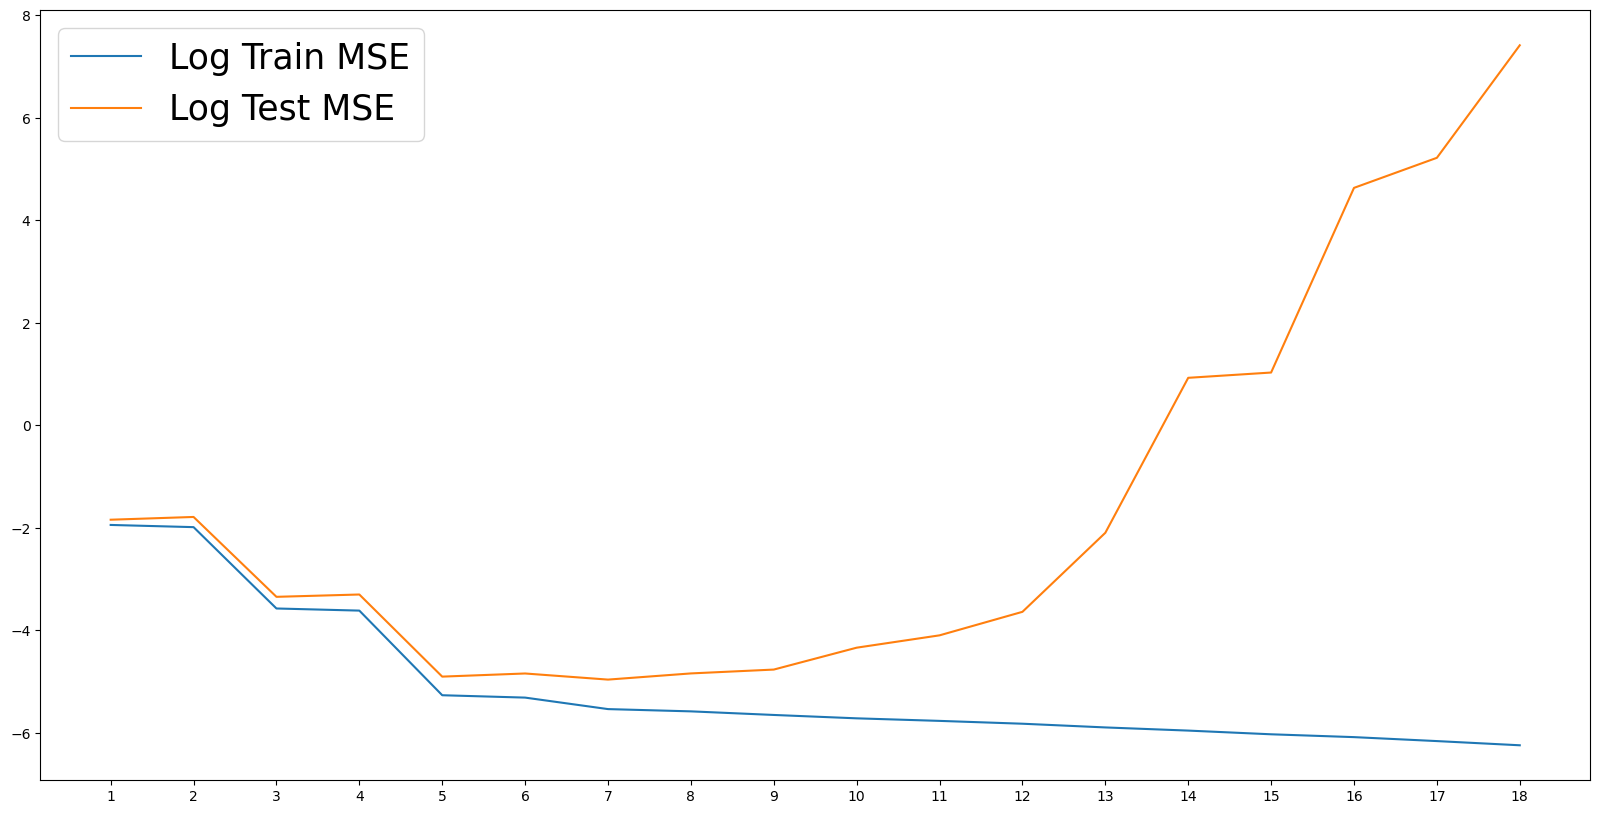

In [16]:
f, ax = plt.subplots(figsize=(20, 10))

plt.plot(final['k'],final['log_mean'])
plt.plot(final_test['k'],final_test['log_mean'])
ax.legend(['Log Train MSE','Log Test MSE'],fontsize=25)
ind = list(range(1,19))
plt.xticks(ind)  


plt.show()
f.savefig("figure3d.png") # save as png
